# Salary prediction in Campus Recruitment



#### The main aim of this project is to build a model to predict the salary a candidate(i.e student) is likely to recieve in a Campus Recruitment. Based on students profile including:
1. Degree specialization
2. Work experience
3. 10th Grade Percentage
4. 12th Grade Percentage
5. Board of Education
etc.


## Model Used for this Project
Since this problem is a regression problem and can be solved by regressor model.

### Below model were used for this project :
    1. Multiple Linear Regression.
    2. Random Forest Regression.
    3. Random Forest Regression (with Hyperparameter tuning)
    4. XGBoost Regression (with Hyperparameter tuning)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Placement_Data_Full_Class.csv')


## Data Preprocessing

In [3]:
dataset.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [4]:
dataset.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:

null_columns=dataset.columns[dataset.isnull().any()]
dataset[null_columns].isnull().sum()

salary    67
dtype: int64

In [6]:
dataset.status.value_counts()

Placed        148
Not Placed     67
Name: status, dtype: int64

In [7]:
cat_binary=['gender','ssc_b','hsc_b','workex','specialisation','status']
cat_multi=['hsc_s','degree_t']

In [8]:
features=['ssc_p','hsc_p','degree_p','etest_p','mba_p']

In [9]:
dataset.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [10]:
#dataset.isnull()

In [11]:
dataset['salary']=dataset['salary'].fillna((0))

## Extracting  Feature attribute and Target attribute from the dataset. 

In [12]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

### Normalizing the feature values.

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[features] = sc.fit_transform(X[features])
#X_test[:, 3:] = sc.transform(X_test[:, 3:])


In [14]:
X.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,M,-0.028087,Others,2.268812,Others,Commerce,-1.140102,Sci&Tech,No,-1.291091,Mkt&HR,-0.597647,Placed
1,2,M,1.113369,Central,1.103448,Others,Science,1.513267,Sci&Tech,Yes,1.087157,Mkt&Fin,0.687620,Placed
2,3,M,-0.213238,Central,0.153313,Central,Arts,-0.322843,Comm&Mgmt,No,0.218908,Mkt&Fin,-0.769474,Placed
3,4,M,-1.046417,Central,-1.318339,Central,Science,-1.957362,Sci&Tech,No,-0.460592,Mkt&HR,-0.489396,Not Placed
4,5,M,1.712332,Central,0.668391,Central,Commerce,0.943909,Comm&Mgmt,No,1.864806,Mkt&Fin,-1.164676,Placed


In [15]:
y.tail(5)

210    400000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, dtype: float64

In [16]:
pd.isnull(X).count()

sl_no             215
gender            215
ssc_p             215
ssc_b             215
hsc_p             215
hsc_b             215
hsc_s             215
degree_p          215
degree_t          215
workex            215
etest_p           215
specialisation    215
mba_p             215
status            215
dtype: int64

### Label Encoding for Binary valued Categorical Features

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#X['gender','ssc_b','hsc_b','workex','specialisation','status'] = le.fit_transform(X['gender','ssc_b','hsc_b','workex','specialisation','status'])

for col in cat_binary:
    X[col]=le.fit_transform(X[col])
    

In [18]:
X.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,1,-0.028087,1,2.268812,1,Commerce,-1.140102,Sci&Tech,0,-1.291091,1,-0.597647,1
1,2,1,1.113369,0,1.103448,1,Science,1.513267,Sci&Tech,1,1.087157,0,0.687620,1
2,3,1,-0.213238,0,0.153313,0,Arts,-0.322843,Comm&Mgmt,0,0.218908,0,-0.769474,1
3,4,1,-1.046417,0,-1.318339,0,Science,-1.957362,Sci&Tech,0,-0.460592,1,-0.489396,0
4,5,1,1.712332,0,0.668391,0,Commerce,0.943909,Comm&Mgmt,0,1.864806,0,-1.164676,1


 ### OneHot Encoding for Multi-valued Categorical Features

In [19]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder #[1,3,5,6,8,9,11,13]
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),cat_multi)], remainder='passthrough')
#ct.fit_transform(X.values)
X = np.array(ct.fit_transform(X))

In [20]:
X

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.59764672,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
         0.6876202 ,  1.        ],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.76947385,  1.        ],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         1.27870553,  1.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.35193393,  1.        ],
       [ 0.        ,  0.        ,  1.        , ...,  1.        ,
        -0.3536522 ,  0.        ]])

In [21]:
print(pd.DataFrame(X).head(5))

    0    1    2    3    4    5    6    7         8    9         10   11  \
0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0 -0.028087  1.0  2.268812  1.0   
1  0.0  0.0  1.0  0.0  0.0  1.0  2.0  1.0  1.113369  0.0  1.103448  1.0   
2  1.0  0.0  0.0  1.0  0.0  0.0  3.0  1.0 -0.213238  0.0  0.153313  0.0   
3  0.0  0.0  1.0  0.0  0.0  1.0  4.0  1.0 -1.046417  0.0 -1.318339  0.0   
4  0.0  1.0  0.0  1.0  0.0  0.0  5.0  1.0  1.712332  0.0  0.668391  0.0   

         12   13        14   15        16   17  
0 -1.140102  0.0 -1.291091  1.0 -0.597647  1.0  
1  1.513267  1.0  1.087157  0.0  0.687620  1.0  
2 -0.322843  0.0  0.218908  0.0 -0.769474  1.0  
3 -1.957362  0.0 -0.460592  1.0 -0.489396  0.0  
4  0.943909  0.0  1.864806  0.0 -1.164676  1.0  


In [22]:
y=y.values

### Feature Selection

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [24]:
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 8.46753159e+03 4.22784275e+01 1.33901691e+04
 0.00000000e+00 0.00000000e+00 1.35160750e+03 0.00000000e+00
 0.00000000e+00 6.14805643e+03 6.85062815e+03 5.42733363e+03
 8.15505956e+03 2.67779068e+05]


In [25]:
print(X.shape[1])
sfm = SelectFromModel(clf, threshold=1e+01)
sfm.fit(X, y)
X_transform = sfm.transform(X)
n_features = sfm.transform(X).shape[1]
print(n_features)

18
9


In [26]:
X_transform

array([[  1.        ,   1.        ,   1.        , ...,   1.        ,
         -0.59764672,   1.        ],
       [  1.        ,   2.        ,   1.        , ...,   0.        ,
          0.6876202 ,   1.        ],
       [  0.        ,   3.        ,   1.        , ...,   0.        ,
         -0.76947385,   1.        ],
       ...,
       [  0.        , 213.        ,   1.        , ...,   0.        ,
          1.27870553,   1.        ],
       [  0.        , 214.        ,   0.        , ...,   1.        ,
         -0.35193393,   1.        ],
       [  0.        , 215.        ,   1.        , ...,   1.        ,
         -0.3536522 ,   0.        ]])

## Spliting the dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transform, y, test_size = 0.2, random_state = 0)

# 1. Training the Multiple Linear Regression model on the Training set

In [28]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 1. Salary prediction using Multiple Linear Regressor

In [29]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[  1212.35      0.  ]
 [249374.51 320000.  ]
 [283442.88 210000.  ]
 [-18963.27      0.  ]
 [315920.4  290000.  ]
 [-19128.        0.  ]
 [287308.78 300000.  ]
 [266397.36 225000.  ]
 [ 23220.24      0.  ]
 [344685.72 300000.  ]
 [255301.95 220000.  ]
 [300906.56 400000.  ]
 [335917.92 300000.  ]
 [254439.77 250000.  ]
 [308449.06 336000.  ]
 [270267.49 260000.  ]
 [320064.73 210000.  ]
 [-30453.41      0.  ]
 [343017.05 340000.  ]
 [ 32937.03      0.  ]
 [ 21051.07      0.  ]
 [ -8151.61      0.  ]
 [285204.61 216000.  ]
 [-16223.28      0.  ]
 [  5989.49      0.  ]
 [-30334.99      0.  ]
 [275874.72 252000.  ]
 [286560.52 200000.  ]
 [281932.88 220000.  ]
 [312362.6  240000.  ]
 [326467.64 252000.  ]
 [-12570.79      0.  ]
 [300965.81 300000.  ]
 [ 13837.52      0.  ]
 [ -5608.46      0.  ]
 [320189.85 285000.  ]
 [311243.53 260000.  ]
 [296108.94 250000.  ]
 [287007.81 300000.  ]
 [306165.63 275000.  ]
 [ 44537.87      0.  ]
 [ 13446.31      0.  ]
 [291237.11 220000.  ]]


### 2. Accuracy on Test set

In [30]:
from sklearn.metrics import r2_score
mlr_acc=r2_score(y_test, y_pred)
mlr_acc

0.8879928147759016

### 3. Visual Comparision of Predicted and Original Salary.

In [31]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


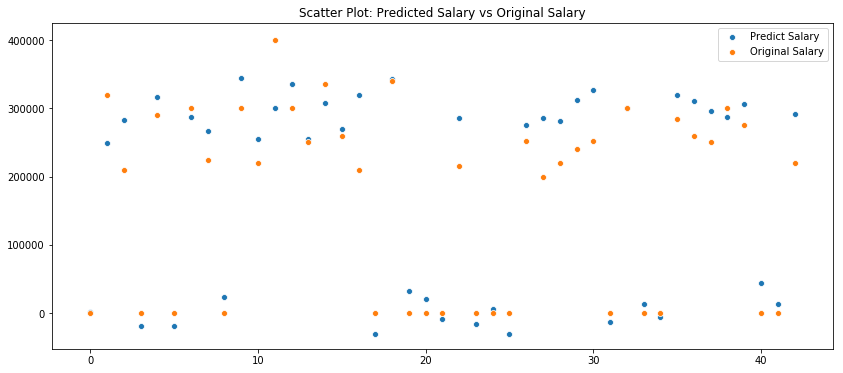

In [32]:
plt.figure(figsize=(14,6))
#sns.lineplot()
index=list(range(0,len(X_test)))
plt.title("Scatter Plot: Predicted Salary vs Original Salary")
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='Original Salary')

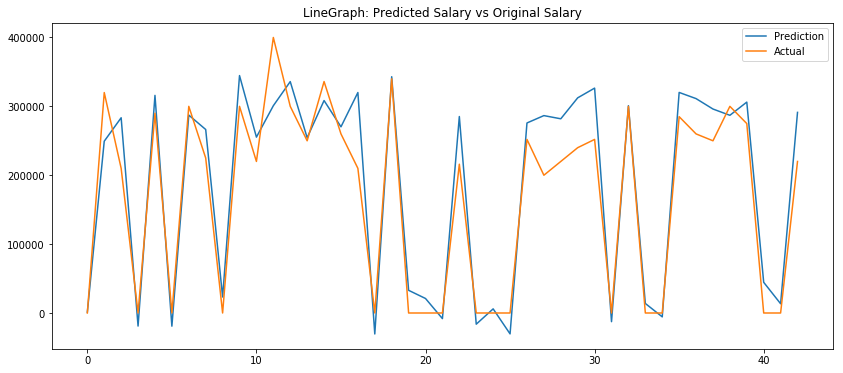

In [33]:
plt.figure(figsize=(14,6))
plt.title("LineGraph: Predicted Salary vs Original Salary")
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

## 2. Training the Random Forest Regression model on the Train dataset

In [34]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

### 1. Salary prediction using Random Forest Regressor

In [35]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0.      0.]
 [284300. 320000.]
 [253900. 210000.]
 [     0.      0.]
 [296400. 290000.]
 [     0.      0.]
 [239100. 300000.]
 [264200. 225000.]
 [     0.      0.]
 [243800. 300000.]
 [254700. 220000.]
 [357800. 400000.]
 [318800. 300000.]
 [256000. 250000.]
 [260600. 336000.]
 [247400. 260000.]
 [275000. 210000.]
 [     0.      0.]
 [330800. 340000.]
 [     0.      0.]
 [     0.      0.]
 [     0.      0.]
 [278500. 216000.]
 [     0.      0.]
 [     0.      0.]
 [     0.      0.]
 [416800. 252000.]
 [302400. 200000.]
 [256000. 220000.]
 [328900. 240000.]
 [266000. 252000.]
 [     0.      0.]
 [255400. 300000.]
 [     0.      0.]
 [     0.      0.]
 [301000. 285000.]
 [328200. 260000.]
 [272500. 250000.]
 [257000. 300000.]
 [309300. 275000.]
 [     0.      0.]
 [     0.      0.]
 [256400. 220000.]]


### 2. Accuracy on Test set.

In [36]:
from sklearn.metrics import r2_score
rfr_acc=r2_score(y_test, y_pred)
rfr_acc

0.8875358601232858

### 3. Visual Comparision of Predicted and Original Salary.

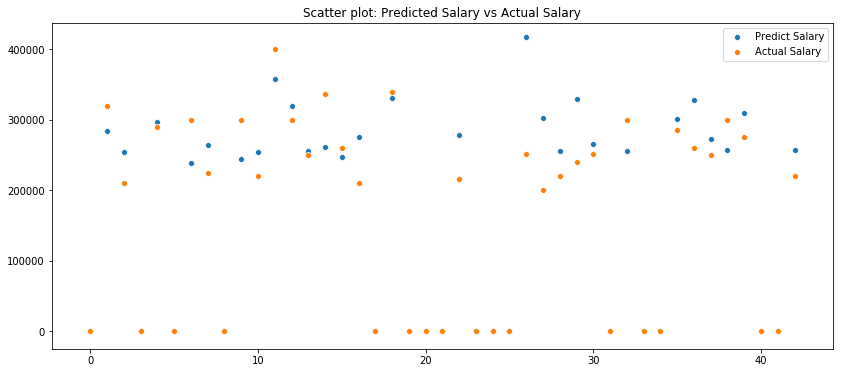

In [37]:
plt.figure(figsize=(14,6))
#sns.lineplot()
#index=list(range(0,len(X_test)))
plt.title("Scatter plot: Predicted Salary vs Actual Salary")
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='Actual Salary')

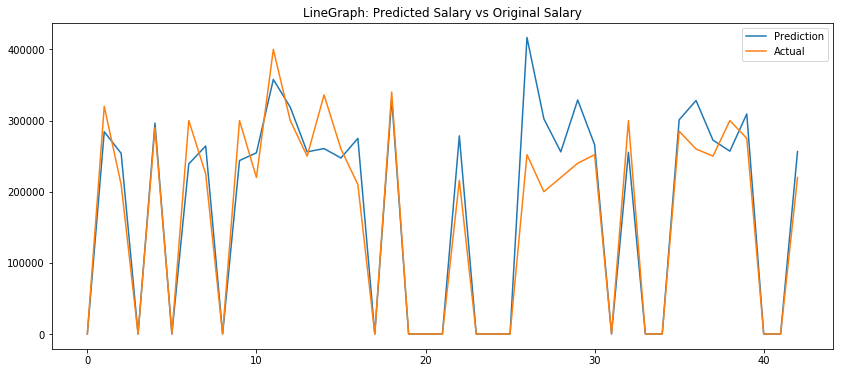

In [38]:
plt.figure(figsize=(14,6))
plt.title("LineGraph: Predicted Salary vs Original Salary")
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

## 3. Training the Random Forest Regression model(with hyperparameter tuning) on the Train dataset

In [39]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestRegressor(), {
    'n_estimators': range(50,100)
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.07, 0.1 , 0.07, 0.07, 0.07, 0.07, 0.06, 0.07, 0.08, 0.11, 0.1 ,
        0.09, 0.08, 0.07, 0.08, 0.08, 0.08, 0.09, 0.1 , 0.13, 0.11, 0.09,
        0.09, 0.09, 0.09, 0.09, 0.1 , 0.1 , 0.09, 0.09, 0.12, 0.13, 0.18,
        0.12, 0.13, 0.11, 0.11, 0.13, 0.12, 0.13, 0.13, 0.13, 0.14, 0.14,
        0.13, 0.14, 0.12, 0.12, 0.14, 0.14]),
 'std_fit_time': array([0.01, 0.04, 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.03, 0.02,
        0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.04, 0.04, 0.02,
        0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  , 0.01, 0.02, 0.01, 0.04,
        0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.  , 0.01, 0.01,
        0.01, 0.02, 0.02, 0.  , 0.03, 0.01]),
 'mean_score_time': array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01,
        0.01, 0.01, 0.  , 0.01, 0.01, 0.01

In [40]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.067225,0.006864,0.003592,0.001196,50,{'n_estimators': 50},0.626915,0.836013,0.714344,0.551365,0.704833,0.686694,0.095160,5
1,0.099525,0.040347,0.004394,0.000801,51,{'n_estimators': 51},0.607400,0.828502,0.707787,0.553035,0.698489,0.679043,0.094396,13
2,0.067829,0.002174,0.003985,0.000013,52,{'n_estimators': 52},0.579108,0.800028,0.709161,0.544779,0.696856,0.665986,0.092761,41
3,0.072612,0.007622,0.003584,0.000483,53,{'n_estimators': 53},0.569894,0.764378,0.726216,0.547806,0.692446,0.660148,0.086068,48
4,0.068815,0.003982,0.003984,0.000631,54,{'n_estimators': 54},0.622825,0.802171,0.731600,0.548270,0.686343,0.678242,0.087447,15
5,0.066026,0.002132,0.003389,0.000488,55,{'n_estimators': 55},0.593854,0.817410,0.713500,0.549436,0.683405,0.671521,0.093940,29
6,0.064421,0.002396,0.003393,0.000491,56,{'n_estimators': 56},0.522211,0.790886,0.722270,0.545736,0.695918,0.655405,0.104149,50
7,0.074412,0.005510,0.004188,0.000747,57,{'n_estimators': 57},0.543362,0.829674,0.723260,0.537319,0.704046,0.667532,0.112341,35
8,0.078391,0.007628,0.004189,0.000399,58,{'n_estimators': 58},0.624311,0.806415,0.707724,0.548053,0.673428,0.671986,0.086003,26
9,0.112108,0.028363,0.004794,0.001718,59,{'n_estimators': 59},0.553336,0.816794,0.717489,0.545085,0.698422,0.666225,0.103687,40


In [41]:
df[['params','mean_test_score']]

,params,mean_test_score
0,{'n_estimators': 50},0.686694
1,{'n_estimators': 51},0.679043
2,{'n_estimators': 52},0.665986
3,{'n_estimators': 53},0.660148
4,{'n_estimators': 54},0.678242
5,{'n_estimators': 55},0.671521
6,{'n_estimators': 56},0.655405
7,{'n_estimators': 57},0.667532
8,{'n_estimators': 58},0.671986
9,{'n_estimators': 59},0.666225


### 1. Salary prediction using Random Forest Regressor(with hyperparameter tuning)

In [42]:
y_pred = clf.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[     0.        0.  ]
 [288328.12 320000.  ]
 [267578.12 210000.  ]
 [     0.        0.  ]
 [296250.   290000.  ]
 [     0.        0.  ]
 [293250.   300000.  ]
 [270046.88 225000.  ]
 [     0.        0.  ]
 [267875.   300000.  ]
 [264875.   220000.  ]
 [303125.   400000.  ]
 [334250.   300000.  ]
 [258484.38 250000.  ]
 [281906.25 336000.  ]
 [257343.75 260000.  ]
 [272234.38 210000.  ]
 [     0.        0.  ]
 [387546.88 340000.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [275984.38 216000.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [363625.   252000.  ]
 [287171.88 200000.  ]
 [260843.75 220000.  ]
 [329484.38 240000.  ]
 [283828.12 252000.  ]
 [     0.        0.  ]
 [278453.12 300000.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [313156.25 285000.  ]
 [290171.88 260000.  ]
 [266171.88 250000.  ]
 [256671.88 300000.  ]
 [279375.   275000.  ]
 [     0.        0.  ]
 [     0.        0.  ]
 [273500.   220000.  ]]


### 2. Accuracy on Test set.

In [43]:
from sklearn.metrics import r2_score
rfr_ht_acc=r2_score(y_test, y_pred)
rfr_ht_acc

0.9095049078339529

### 3. Visual Comparision of Predicted and Original Salary.

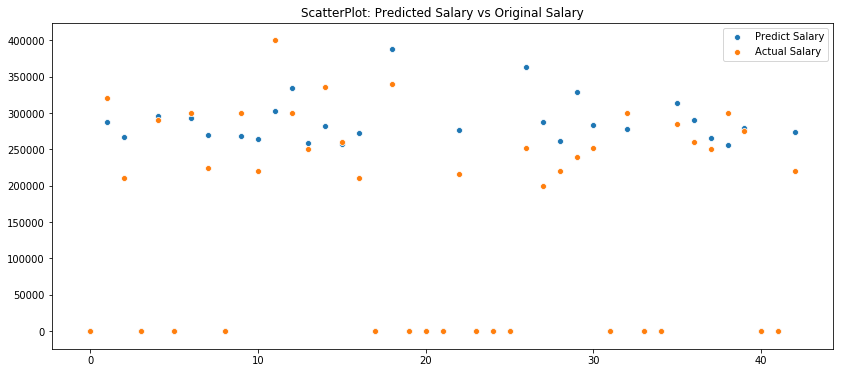

In [44]:
plt.figure(figsize=(14,6))

plt.title("ScatterPlot: Predicted Salary vs Original Salary")
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='Actual Salary')

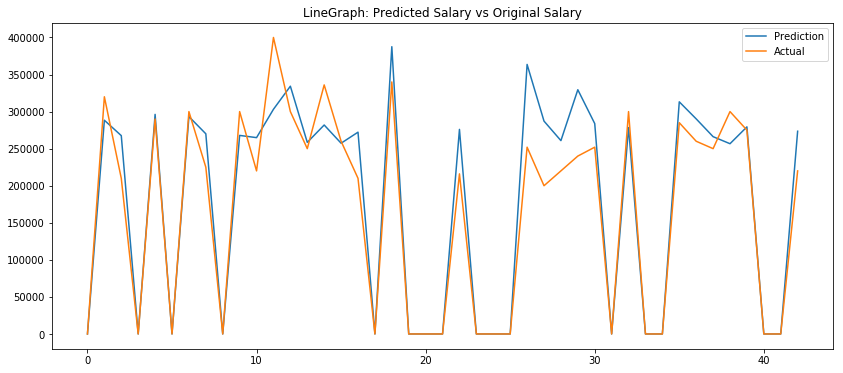

In [45]:
plt.figure(figsize=(14,6))
plt.title("LineGraph: Predicted Salary vs Original Salary")
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

## 4. Training the XGBoost Regression model(with hyperparameter tuning) on the training set

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import train_test_split
#X, y = make_regression(random_state=0)
#reg = GradientBoostingRegressor(random_state=0)

In [47]:
clf = GridSearchCV(GradientBoostingRegressor(random_state=0), {
    'learning_rate':[0.1,0.2,0.3,0.4,0.5],
    'n_estimators':range(50,100)
    #'n_iter_no_change':1
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_

{'mean_fit_time': array([0.02, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03,
        0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
        0.04, 0.04, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
        0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02,
        0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04, 0.02, 0.02, 0.03,
        0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.04, 0.03, 0.03, 0.02,
        0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
        0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04, 0.03, 0.03, 0.03, 0.03,
        0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.04,
        0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.02, 0.03, 0.02, 0.02, 0.02,
        0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
        0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.03, 0.03, 0.03,
        0.03, 0.04, 0

In [48]:
df = pd.DataFrame(clf.cv_results_)


### 1. Salary prediction using  XGBoost Regressor

In [49]:
#reg.fit(X_train, y_train)
y_pred = clf.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 27468.62      0.  ]
 [246457.89 320000.  ]
 [274456.14 210000.  ]
 [  7088.75      0.  ]
 [288427.55 290000.  ]
 [ -2989.78      0.  ]
 [322078.38 300000.  ]
 [261376.1  225000.  ]
 [ 35337.52      0.  ]
 [319208.42 300000.  ]
 [267469.   220000.  ]
 [313068.83 400000.  ]
 [325738.4  300000.  ]
 [251836.45 250000.  ]
 [296031.75 336000.  ]
 [251404.1  260000.  ]
 [279795.95 210000.  ]
 [-18997.2       0.  ]
 [314343.94 340000.  ]
 [ 10039.51      0.  ]
 [ 41880.13      0.  ]
 [  1876.31      0.  ]
 [261311.15 216000.  ]
 [  7754.04      0.  ]
 [  9795.02      0.  ]
 [  -908.75      0.  ]
 [301128.02 252000.  ]
 [267679.95 200000.  ]
 [255844.   220000.  ]
 [317692.58 240000.  ]
 [261236.76 252000.  ]
 [ 10540.96      0.  ]
 [279670.74 300000.  ]
 [ 13428.43      0.  ]
 [  5814.99      0.  ]
 [315157.61 285000.  ]
 [276701.11 260000.  ]
 [273836.61 250000.  ]
 [271499.59 300000.  ]
 [282182.32 275000.  ]
 [ 15447.14      0.  ]
 [  1857.08      0.  ]
 [263671.2  220000.  ]]


### 2.  Accuracy on Test set.

In [50]:
from sklearn.metrics import r2_score
xgb_acc=r2_score(y_test, y_pred)
xgb_acc

0.9285562298736147

### 3. Visual Comparision of Predicted and Original Salary.

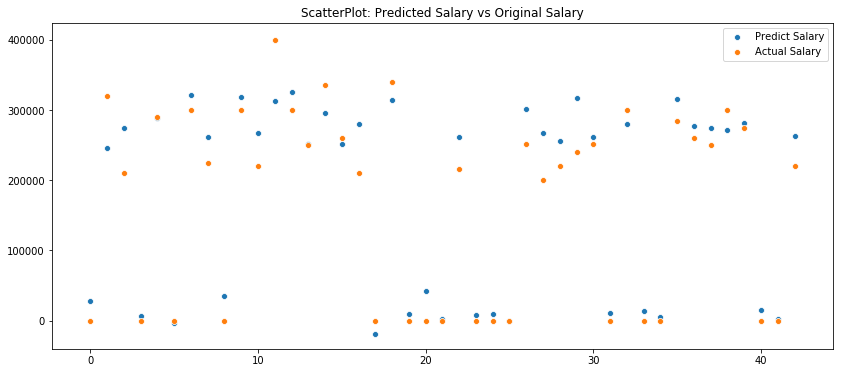

In [51]:
plt.figure(figsize=(14,6))
plt.title("ScatterPlot: Predicted Salary vs Original Salary")
sns.scatterplot(x=index,y=y_pred,label='Predict Salary')
sns.scatterplot(x=index,y=y_test,label='Actual Salary')

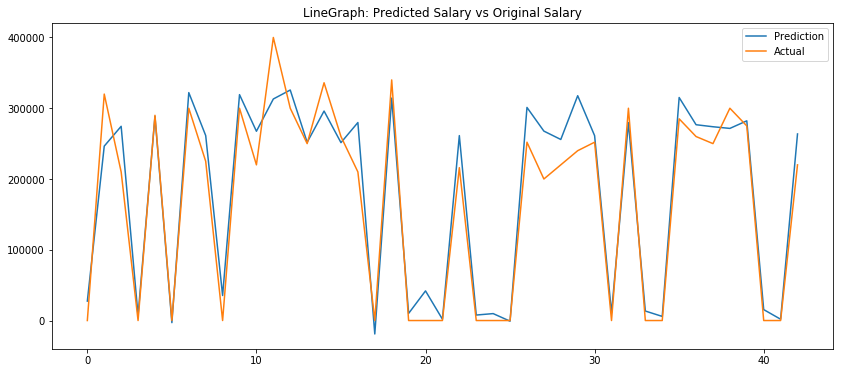

In [52]:
plt.figure(figsize=(14,6))
plt.title("LineGraph: Predicted Salary vs Original Salary")
sns.lineplot(data=y_pred, label="Prediction")
sns.lineplot(data=y_test, label="Actual")

## Result Comparison of various Model

In [53]:
results=pd.Series([mlr_acc,rfr_acc,rfr_ht_acc,xgb_acc],index=["Multiple linear","Random forest","Random Forest(ht)","XGBosst(ht)"])
results

Multiple linear      0.887993
Random forest        0.887536
Random Forest(ht)    0.909505
XGBosst(ht)          0.928556
dtype: float64

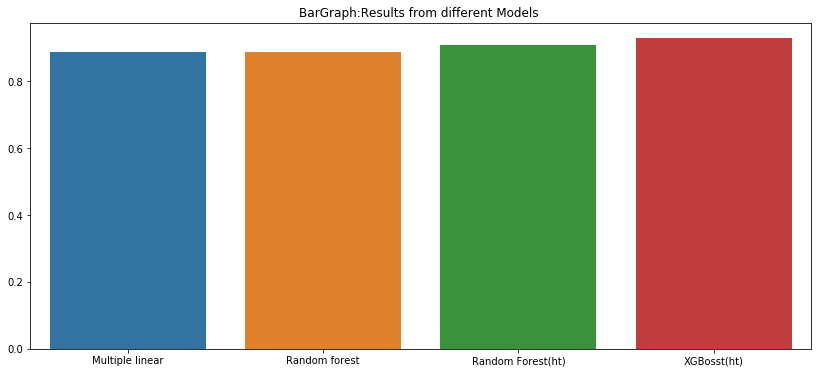

In [54]:
plt.figure(figsize=(14,6))
plt.title("BarGraph:Results from different Models ")
sns.barplot(x=results.index, y=results.values)

Text(0.5,1,'LineGraph: Result from different Model')

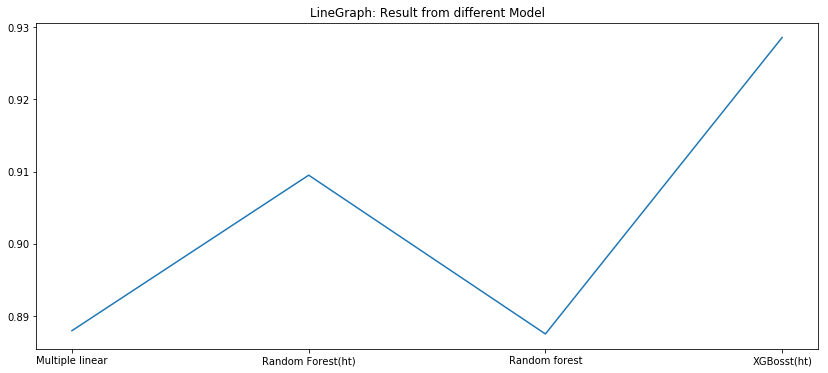

In [55]:
plt.figure(figsize=(14,6))
sns.lineplot(y=results.values,x=results.index)
plt.title("LineGraph: Result from different Model")

## Analysis of Results from different models.

#### From analysis of:
    1. Accuracy Result of each model.
    2. BarGraph plot of Result from different Model
    3. LineGraph plot of Result from different Model
It can be noticed that XGBoost Model produces highest accuracy. Whereas Random Forest Model with Hyperparameter tuning produces 
improved result as compared to Random Forest Model without Hyperparameter tuning. Multiple linear regession model produces comparable result.

#### Model Based on Accuracy (Decreasing):
    1.XGBoost
    2.Random Forest(Hyperparameter tuning)
    3.Random Forest
    4.Multiple Linear Regression

### Dataset Source:https://www.kaggle.com/benroshan/factors-affecting-campus-placement